In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **DATA PROCESSING**

In [ ]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


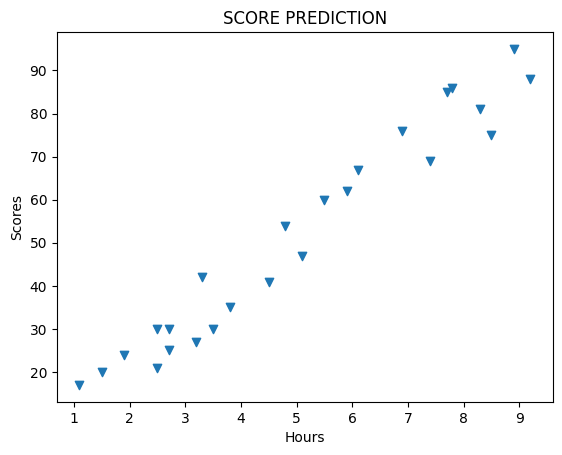

In [ ]:
plt.title('SCORE PREDICTION')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data['Hours'],data['Scores'],marker='v')

In [ ]:
x = data['Hours'].values
y = data['Scores'].values

# **ALGORITHM FORMATION**

*output function*
$$f_{w,b} = wx^{(i)}+b$$
*cost function*
$$J_{w,b} = \frac{1}{2m}\sum\limits_{i=0}^{m} (wx^{(i)}+b-y^{(i)})^2$$
*gradient functions*
$$\frac{dj_{(w,b)}}{dw} = \frac{1}{m}\sum\limits_{i=0}^{m}[wx^{(i)}+b-y{(i)}].x^{(i)}$$
$$\frac{dj_{(w,b)}}{db} = \frac{1}{m}\sum\limits_{i=0}^{m}wx^{(i)}+b-y{(i)}$$
*gradient descent*
$$w = w - \alpha\frac{dj_{(w,b)}}{dw}$$
$$b = b - \alpha\frac{dj_{(w,b)}}{db}$$

In [ ]:
def linearRegression(x,y,alpha,repeat,w,b,info):

  #output
  def compute_output(w,b,xi):
    return w*xi + b

  #compute cost
  def compute_cost(w,b,x,y):
    m = len(x)
    j = 0
    for i in range(0,m):
      j += ((w*x[i])+b-y[i])**2
    j += (1/2)*m
    return j

  #compute gradient
  def compute_gradient(w,b,x,y):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(0,m):
      dj_dw += ((w*x[i])+b-y[i])*x[i]
      dj_db += ((w*x[i])+b-y[i])
    dj_dw *= 1/m
    dj_db *= 1/m
    return dj_dw,dj_db

  #compute gradient descent
  def compute_descent(w,b,x,y,alpha,repeat):
    for i in  range(0,repeat):
      dj_dw,dj_db = compute_gradient(w,b,x,y)
      w = w - alpha * dj_dw
      b = b - alpha * dj_db
      if(((i%(repeat/100))==0)&info==1):
        print(f'iteration[{(i+1)}]: w-{w} b-{b} j-{compute_cost(w,b,x,y)} dj_dw-{dj_dw} dj_db-{dj_db}')
    return w,b

  #calling gradient descent with appropiate parameters
  w,b = compute_descent(w,b,x,y,alpha,repeat)
  f_wb = []
  for i in range(0,len(x)):
    f_wb.append(compute_output(w,b,x[i]))

  #returning the output(y_hat) as f_wb
  return f_wb,w,b

# **TESTING**

In [ ]:
#calling Custom Linear Regression model
alpha = 1.0e-2 #~0.01
repeat = 20000
info = 0 #0 - Don't Show 1-Show
f_wb,w,b = linearRegression(x,y,alpha,repeat,0,0,info)

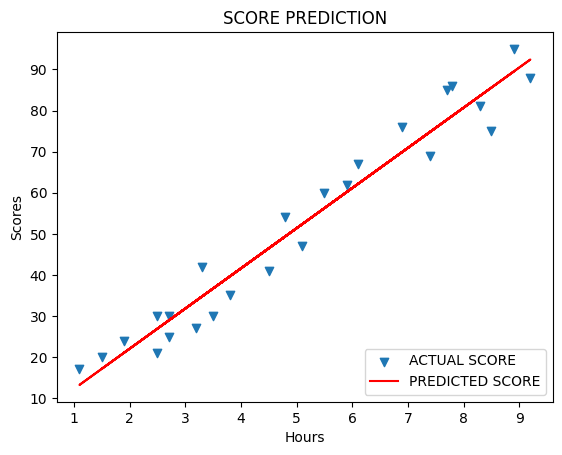

In [ ]:
plt.title('SCORE PREDICTION')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.scatter(data['Hours'],data['Scores'],marker = 'v')
plt.plot(data['Hours'],f_wb,color='red')

plt.legend(["ACTUAL SCORE","PREDICTED SCORE"], loc="lower right")

In [ ]:
# Predicting The Score
hours = 9.25
print(f'Predicted Score: {w*hours+b}')

Predicted Score: 92.90985477015742


In [ ]:
# calculating Mean Absolute Error to check our model
error = 0
for i in range(0,len(x)):
  error += abs(y[i]-(w*x[i]+b))
error /= len(x)
print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 4.972805319866388
